In [241]:
import requests

In [289]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

In [290]:
url = "http://127.0.0.1:8000/stylize"


In [295]:
content = '/home/volodymyr/me2.png'

In [296]:
style = '/home/volodymyr/picaso3.jpg'

In [297]:
def to_bytes(image):
    with BytesIO() as output:
        with Image.fromarray(image) as img:
            img.convert('RGB').save(output, 'BMP')
        data = output.getvalue()
    return data

In [298]:
content_arr = np.array(Image.open(content))
style_arr = np.array(Image.open(style))

In [299]:
r = requests.post(url, files={"content_image":  to_bytes(content_arr),
                             "style_image" : to_bytes(style_arr)})


In [300]:
image = Image.open(BytesIO(base64.b64decode(json.loads(r.content.decode()))))

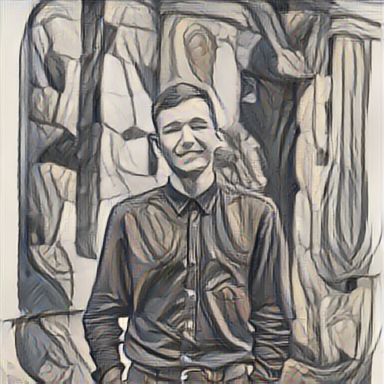

In [301]:
image

In [280]:
image = np.array(image).astype(np.uint8).reshape(384,384,3)

In [281]:
def show_results(images,titles = ['style','content','result']):
    fig, ax = plt.subplots(1,3, figsize=(14,12))
    for c,image in enumerate(images):
        ax[c].imshow(image)
        ax[c].set_title(titles[c])

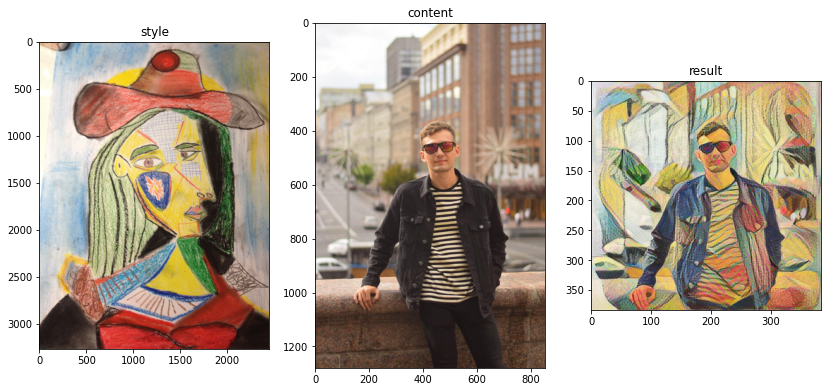

In [282]:
show_results([style_arr,content_arr, image])